In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
can = pd.read_csv("Breast_cancer_data.csv")

In [3]:
print(can.shape)
print('\n')
print(can.sample(5))
print('\n')
print(can.info())
print('\n')
print(can.describe())
print('\n')
print(can.isnull().sum())
print('\n')
print(can.duplicated().sum())

(569, 6)


     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
430        14.90         22.53          102.10      685.0          0.09947   
323        20.34         21.51          135.90     1264.0          0.11700   
457        13.21         25.25           84.10      537.9          0.08791   
147        14.95         18.77           97.84      689.5          0.08138   
310        11.70         19.11           74.33      418.7          0.08814   

     diagnosis  
430          0  
323          0  
457          1  
147          1  
310          1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null  

Correlation among the Data

In [4]:
correlation = can.corr()
correlation

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


Pair PLot of the Data

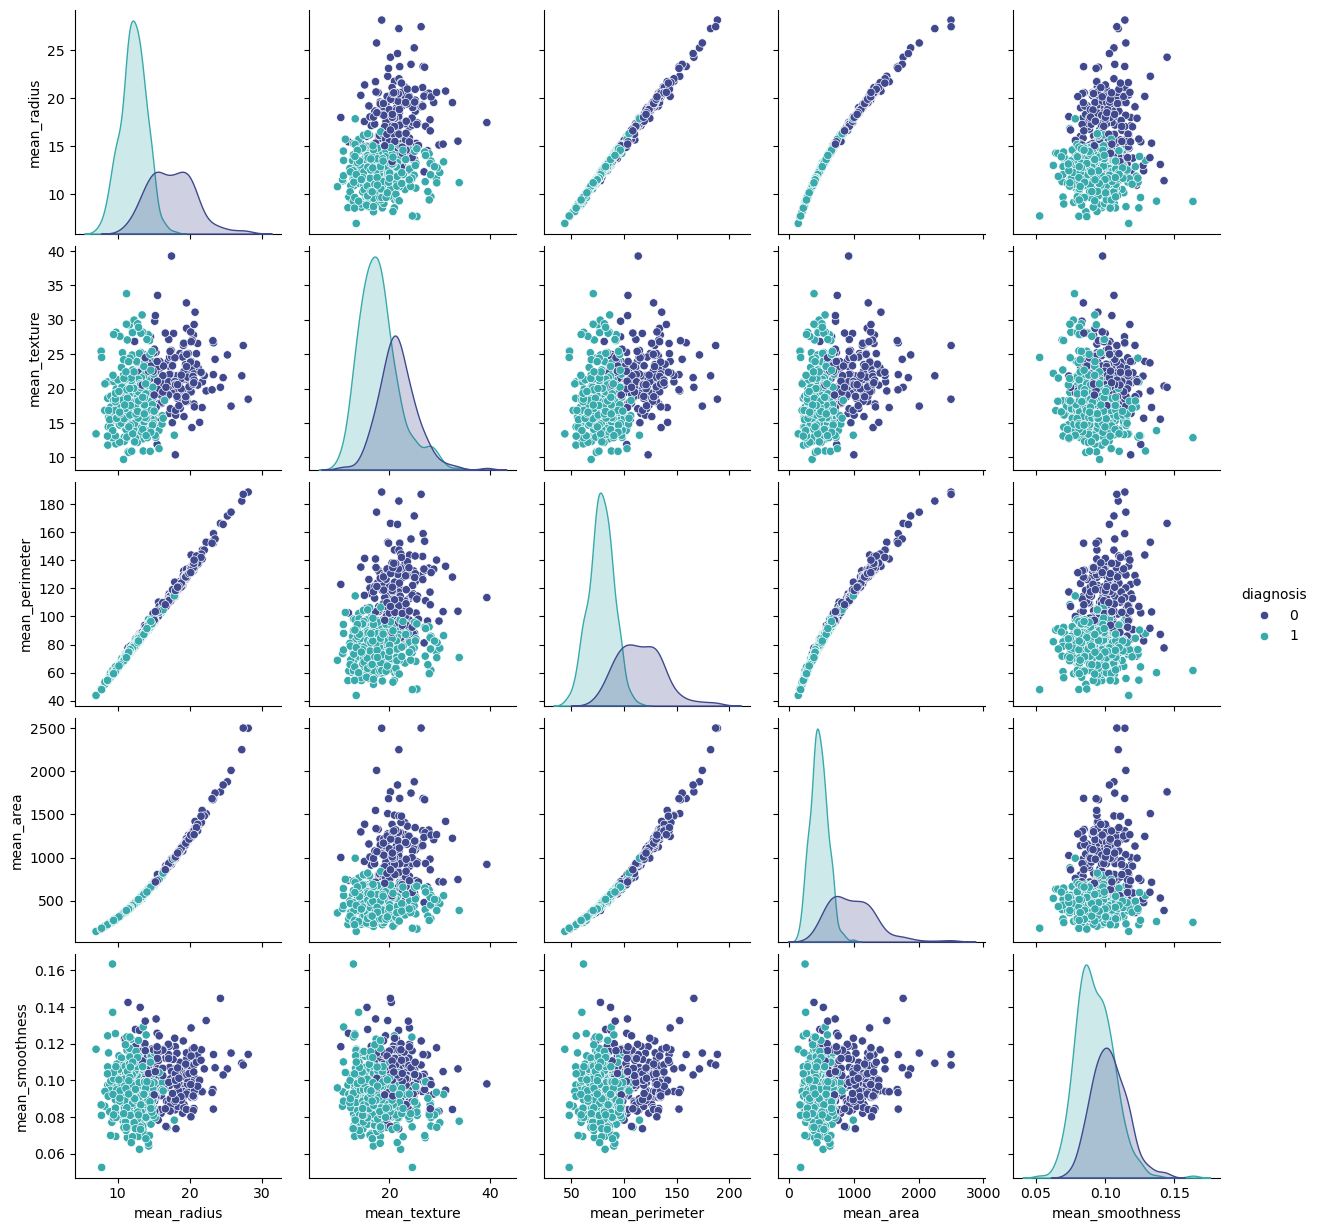

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(can, hue = 'diagnosis', palette='mako')

<Axes: xlabel='mean_radius', ylabel='mean_perimeter'>

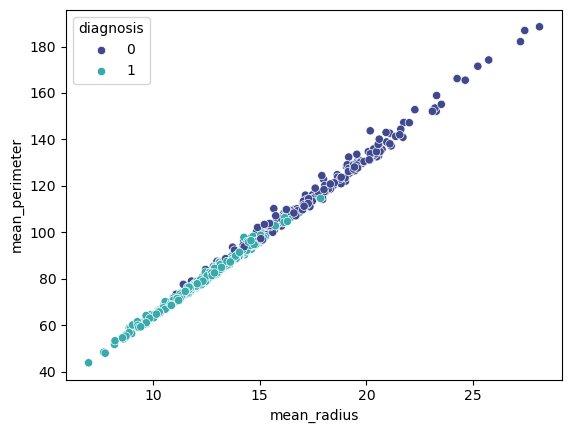

In [6]:
sns.scatterplot(x = can['mean_radius'],y = can['mean_perimeter'], hue = can['diagnosis'], palette='mako')

<Axes: xlabel='mean_radius', ylabel='mean_area'>

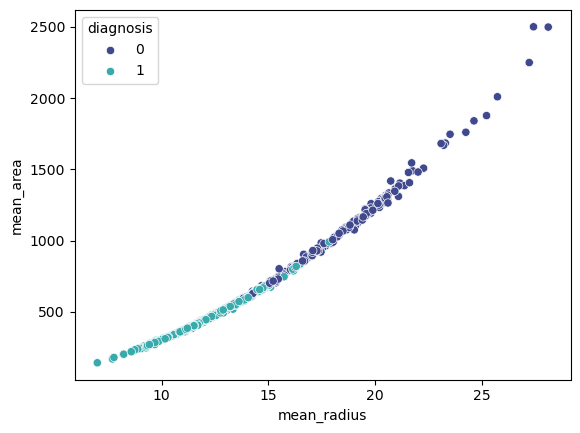

In [7]:
sns.scatterplot(x = can['mean_radius'], y = can['mean_area'], hue = can['diagnosis'], palette='mako')

<Axes: xlabel='mean_perimeter', ylabel='mean_area'>

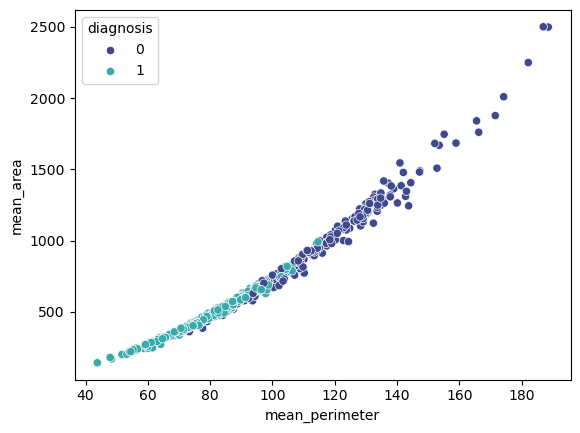

In [8]:
sns.scatterplot(x = can['mean_perimeter'], y = can['mean_area'], hue = can['diagnosis'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_radius'>

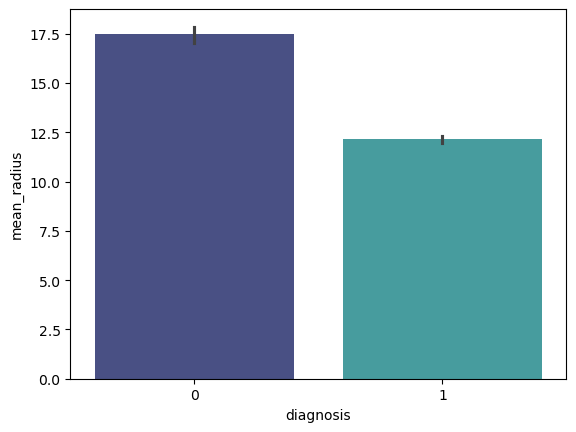

In [9]:
sns.barplot(x = can['diagnosis'],y = can['mean_radius'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_area'>

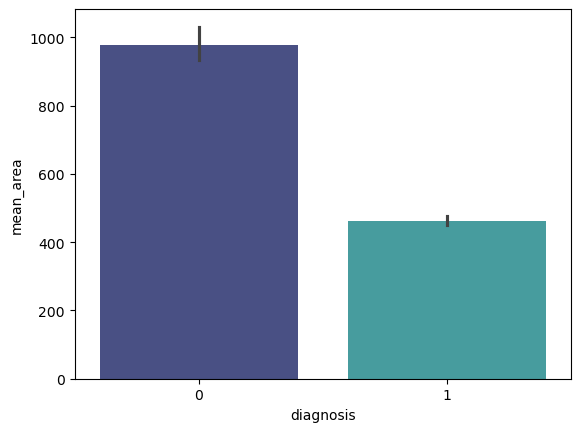

In [10]:
sns.barplot(x = can['diagnosis'],y = can['mean_area'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_perimeter'>

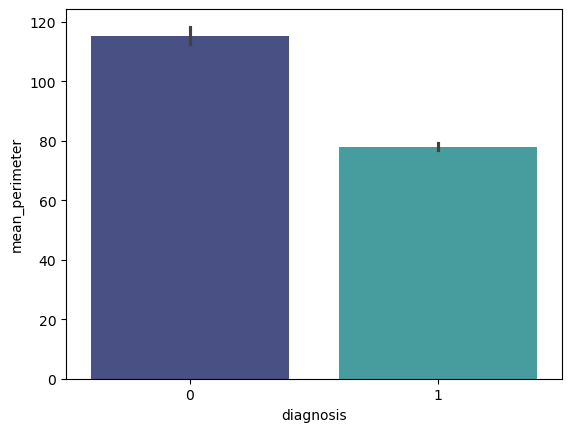

In [11]:
sns.barplot(x = can['diagnosis'],y = can['mean_perimeter'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_radius'>

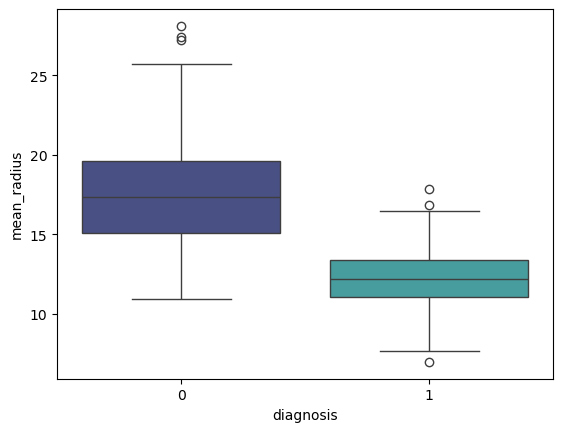

In [12]:
sns.boxplot(x = can['diagnosis'], y = can['mean_radius'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_area'>

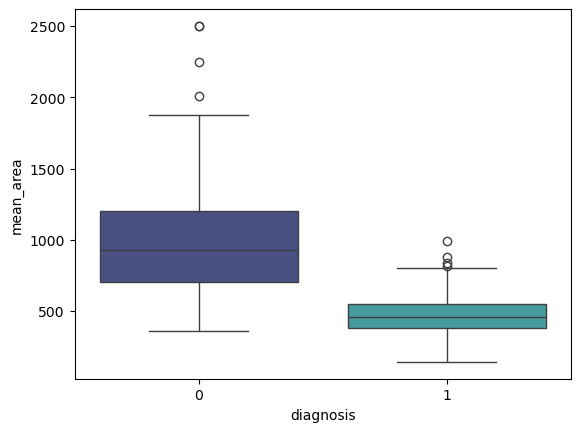

In [13]:
sns.boxplot(x = can['diagnosis'], y = can['mean_area'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_perimeter'>

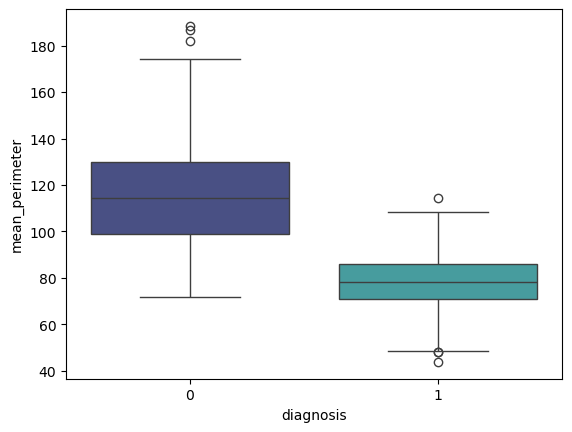

In [14]:
sns.boxplot(x = can['diagnosis'], y = can['mean_perimeter'], palette='mako')

<Axes: xlabel='diagnosis', ylabel='mean_radius'>

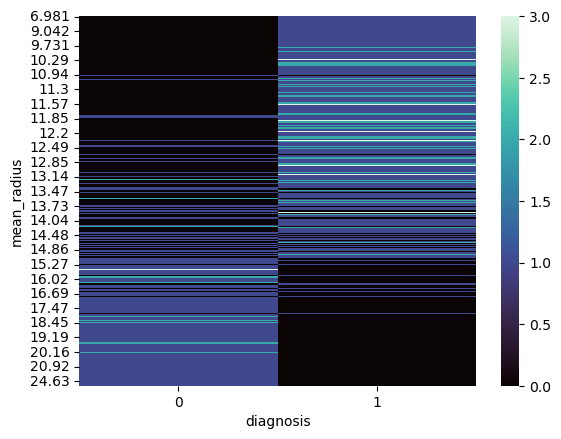

In [15]:
sns.heatmap(pd.crosstab(can['mean_radius'],can['diagnosis']), cmap = 'mako')

<Axes: xlabel='diagnosis', ylabel='mean_perimeter'>

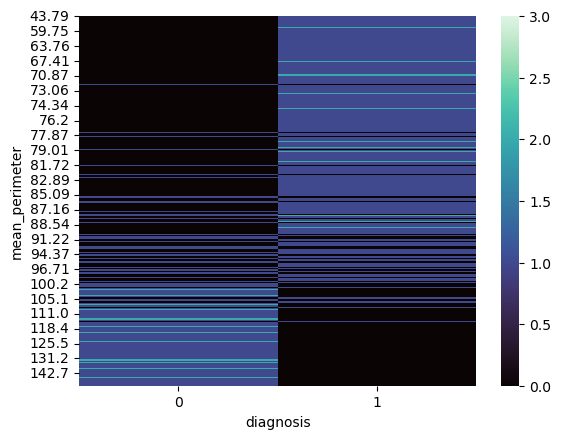

In [16]:
sns.heatmap(pd.crosstab(can['mean_perimeter'],can['diagnosis']),cmap = 'mako')

<Axes: xlabel='diagnosis', ylabel='mean_area'>

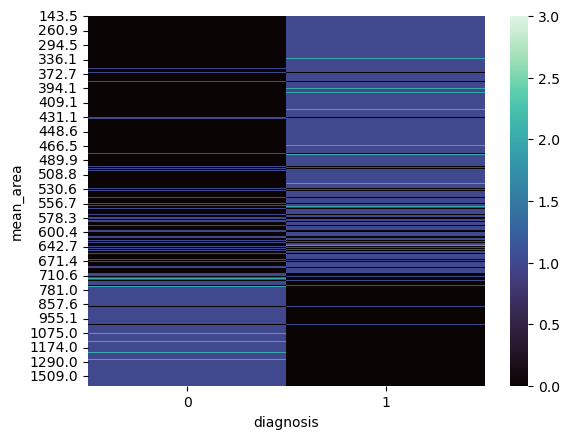

In [17]:
sns.heatmap(pd.crosstab(can['mean_area'],can['diagnosis']), cmap='mako')

<Axes: >

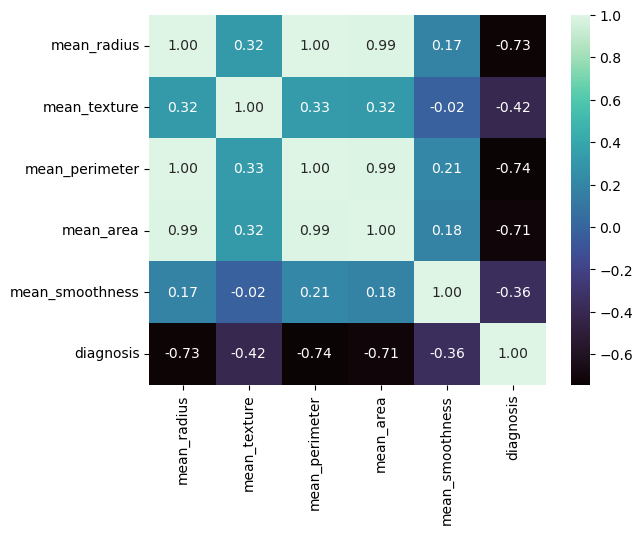

In [18]:
sns.heatmap(correlation, annot= True, fmt='.2f', cmap = 'mako')

In [19]:
x = can[['mean_radius','mean_area','mean_perimeter','mean_texture','mean_smoothness']]
y = can['diagnosis']
print(x.shape)
print(y.shape)


(569, 5)
(569,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
Model = LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred = Model.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred) * 100

93.85964912280701

In [24]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

# percentage
sum = np.sum(cm, axis = 1)
cm1 = (cm/sum)*100
print(cm1)

[[39  4]
 [ 3 68]]
[[90.69767442  5.63380282]
 [ 6.97674419 95.77464789]]


<Axes: >

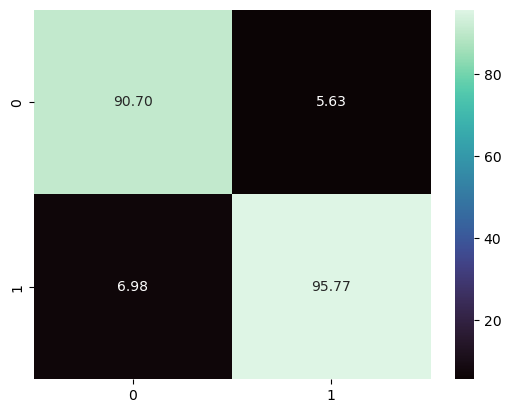

In [25]:
sns.heatmap(cm1, annot = True, fmt = '.2f', cmap = 'mako')

In [26]:
Classification = classification_report(y_test, y_pred, output_dict= True)
Classification_frame = pd.DataFrame(Classification).T

In [27]:
Classification_frame

,precision,recall,f1-score,support
0,0.928571,0.906977,0.917647,43.000000
1,0.944444,0.957746,0.951049,71.000000
accuracy,0.938596,0.938596,0.938596,0.938596
macro avg,0.936508,0.932362,0.934348,114.000000
weighted avg,0.938457,0.938596,0.938450,114.000000
